<b>Modules

In [2]:
import pandas as pd # Library for importing the data
from sklearn.decomposition import PCA # Library for implementing PCA
from sklearn.preprocessing import StandardScaler # Libary for scaling the data
import matplotlib.pyplot as plt # Library for visualising the data
import seaborn as sns # Library for visualising the data
import numpy as np # Libary for working with nd-data
import category_encoders as encoders # For encoding categorical variables

<b>Dataset

In [3]:
# Read the Dataset
Dataset = pd.read_csv("../data/Login_Data.csv")

# Display the Data
Dataset.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False


In [4]:
# Display the Shape of the Dataset
print(f"Shape of the Dataset is : {Dataset.shape}")

Shape of the Dataset is : (31269264, 9)


In [5]:
print("Length of DataFrame:", '{:,}'.format(len(Dataset))) # Number of entries

Length of DataFrame: 31,269,264


In [6]:
# Find out the Duplicates Data
count_duplicate = Dataset.duplicated().sum()

# Display the Duplicated Data
print(f"Total Duplicated Data in the Dataset is : {count_duplicate}")

Total Duplicated Data in the Dataset is : 0


In [7]:
# Splitting "Browser Name and Version" column into "Browser Name" and "Version"
Dataset[['Browser Name', 'Version']] = Dataset['Browser Name and Version'].str.extract(r'([a-zA-Z]+[a-zA-Z\s]*[a-zA-Z]+) (\d.*\d)')

# Dropping the original combined column
Dataset.drop('Browser Name and Version', axis=1, inplace=True)

In [8]:
# Check the Nan Values in the Dataset
nanValues = Dataset.isnull().sum()
print(f"The Missing Values in the Dataset is : \n\n{nanValues}")

The Missing Values in the Dataset is : 

Login Timestamp         0
User ID                 0
IP Address              0
Country                 0
Region              47409
City                 8590
Device Type          1526
Login Successful        0
Browser Name        60307
Version             60307
dtype: int64


In [9]:
# Display the Information of the Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269264 entries, 0 to 31269263
Data columns (total 10 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Login Timestamp   object
 1   User ID           int64 
 2   IP Address        object
 3   Country           object
 4   Region            object
 5   City              object
 6   Device Type       object
 7   Login Successful  bool  
 8   Browser Name      object
 9   Version           object
dtypes: bool(1), int64(1), object(8)
memory usage: 2.1+ GB


<b>Find Unique Values Count of Important Columns

In [10]:
# Check the Unique Values in the (Region Column)
count_region = Dataset["Region"].value_counts()
print(f"Unique Values Count of Region Column is : \n\n{count_region}")

Unique Values Count of Region Column is : 

Region
-                         14013381
Oslo County                2314071
Viken                      1994024
Rogaland                   1713780
Innlandet                   834122
                            ...   
Distrikt Commewijne              1
Berane                           1
Jaunpils                         1
Fakaofo                          1
Parish of Saint Philip           1
Name: count, Length: 2638, dtype: int64


In [11]:
# Check the Unique Values in the (City Column)
count_city = Dataset["City"].value_counts()
print(f"Unique Values Count of City Column is : \n\n{count_city}")

Unique Values Count of City Column is : 

City
-                    13904552
Oslo                  2308651
Stavanger              526800
St Petersburg          516977
Bergen                 341021
                       ...   
Marcilly-sur-Eure           1
Kastornoye                  1
Tsudanuma                   1
Neudorf                     1
Chotoviny                   1
Name: count, Length: 38885, dtype: int64


In [12]:
# Check the Unique Values in the (Device Type Column)
count_device = Dataset["Device Type"].value_counts()
print(f"Unique Values Count of Device Type Column is : \n\n{count_device}")

Unique Values Count of Device Type Column is : 

Device Type
mobile     19642650
desktop     7934515
bot         2027834
unknown      867371
tablet       795368
Name: count, dtype: int64


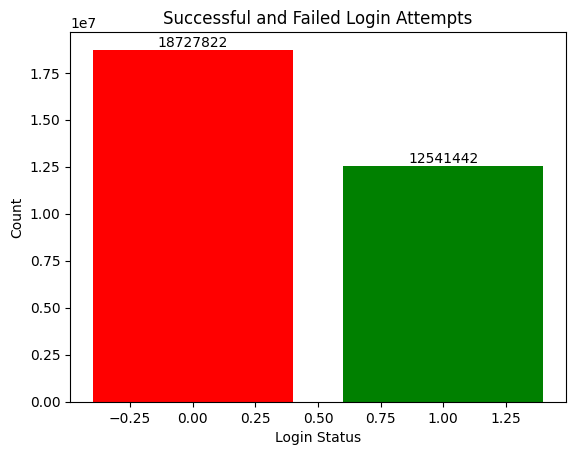

In [13]:
import matplotlib.pyplot as plt

# Check the Unique Values in the 'Login Successful' Column
count_login = Dataset["Login Successful"].value_counts()

# Plotting the chart
labels = count_login.index
values = count_login.values

colors = ['red', 'green']  # Define colors for failed and successful login

# Assigning specific colors to successful and failed login bars
color_map = {label: color for label, color in zip(labels, colors)}

plt.bar(labels, values, color=[color_map[label] for label in labels])
plt.xlabel('Login Status')
plt.ylabel('Count')
plt.title('Successful and Failed Login Attempts')

# Adding annotations to the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


<b>Preprocessing Dataset

Handle the Missing Values

In [14]:
# Handle the Missing Values for (Region Column)
Dataset["Region"].fillna("unknown" , inplace = True)

# Handle this Sign "_" 
Dataset["Region"] = Dataset["Region"].replace("-" , "unknown")

In [15]:
# Handle the Missing Values for (City Column)
Dataset["City"].fillna("unknown" , inplace = True)

# Handle this Sign "_" 
Dataset["City"] = Dataset["City"].replace("-" , "unknown")

In [16]:
# Handle the Missing Values for (Device Type)
Dataset["Device Type"].fillna("unknown" , inplace = True)

In [17]:
# Handle the Missing Values for "Browser Name"
Dataset["Browser Name"].fillna("unknown", inplace=True)

# Handle the Missing Values for "Version"
Dataset["Version"].fillna("unknown", inplace=True)


In [18]:
nanValues = Dataset.isnull().sum()
print(f"The Missing Values in the Dataset is : \n\n{nanValues}")

The Missing Values in the Dataset is : 

Login Timestamp     0
User ID             0
IP Address          0
Country             0
Region              0
City                0
Device Type         0
Login Successful    0
Browser Name        0
Version             0
dtype: int64


Handle the Categorical Data

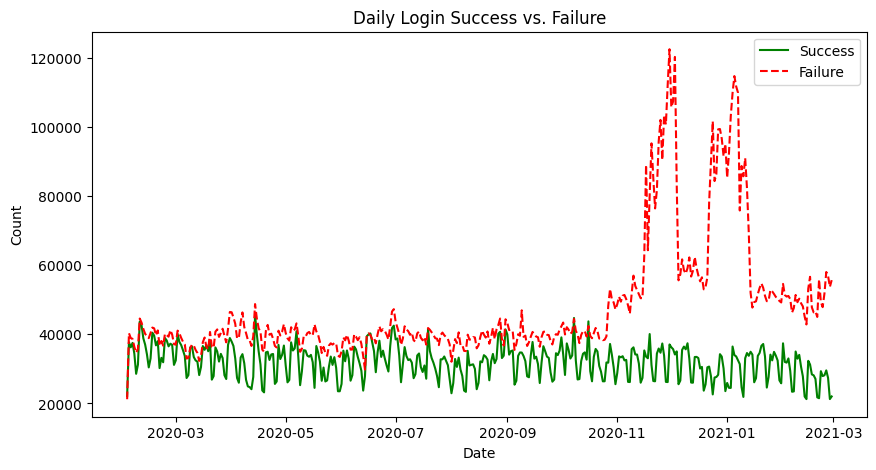

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Login Timestamp to datetime
Dataset["Login Timestamp"] = pd.to_datetime(Dataset["Login Timestamp"])

# Group data by day and Login Successful status, and calculate counts
login_data = Dataset.groupby([pd.Grouper(key="Login Timestamp", freq="D"), "Login Successful"]).size().reset_index(name="count")

# Pivot the data for plotting
login_data_pivot = login_data.pivot(index="Login Timestamp", columns="Login Successful", values="count")

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the line chart for Login Success
ax.plot(login_data_pivot.index, login_data_pivot[True], label="Success", color="green", linestyle="-")

# Plot the line chart for Login Failure
ax.plot(login_data_pivot.index, login_data_pivot[False], label="Failure", color="red", linestyle="--")

# Set plot title, x-axis label, and y-axis label
ax.set_title("Daily Login Success vs. Failure")
ax.set_xlabel("Date")
ax.set_ylabel("Count")

# Display the legend
ax.legend()

# Display the plot
plt.show()


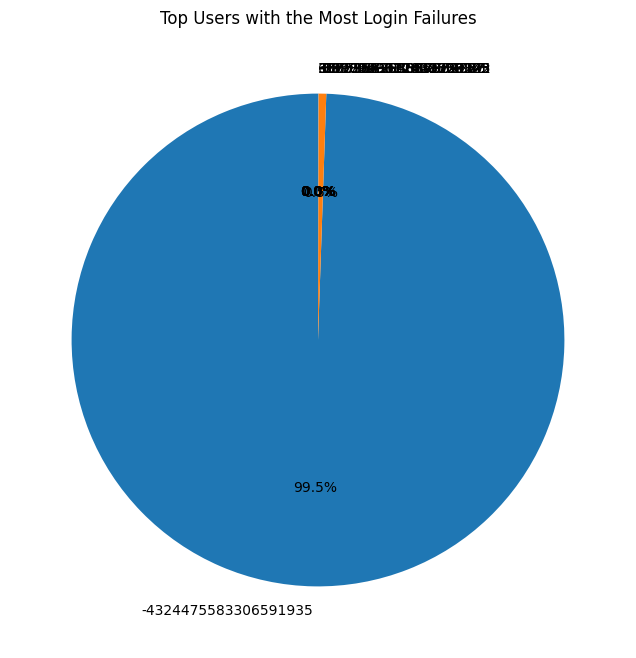

In [20]:
import matplotlib.pyplot as plt

# Get the top users with the most login failures
user_failures = Dataset[Dataset['Login Successful'] == False]['User ID'].value_counts()
top_users = user_failures.head(10).sort_values(ascending=False)

# Create a pie chart to visualize the results
plt.figure(figsize=(8, 8))
plt.pie(top_users.values, labels=top_users.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Top Users with the Most Login Failures')

# Display the chart
plt.show()


In [21]:
Dataset = Dataset[Dataset['User ID'] != -4324475583306591935]  # Excluding too many login failures of this single user to ensure model fairness

In [22]:
# Get the top IP addresses with the most login failures
ip_failures = Dataset[Dataset['Login Successful'] == False]['IP Address'].value_counts()
top_ips = ip_failures.head(10).sort_values(ascending=False)

# Print the results
print("Top IP Addresses with the Most Login Failures:")
for i, (ip_address, count) in enumerate(top_ips.items(), 1):
    print(f"IP Address={ip_address}, Failures={count}")

Top IP Addresses with the Most Login Failures:
IP Address=158.149.114.95, Failures=36411
IP Address=109.203.1.148, Failures=24635
IP Address=109.203.29.82, Failures=8647
IP Address=10.0.77.226, Failures=5297
IP Address=10.0.160.77, Failures=4187
IP Address=10.0.77.229, Failures=1888
IP Address=10.0.77.227, Failures=1780
IP Address=10.0.77.228, Failures=1664
IP Address=10.0.160.76, Failures=1442
IP Address=84.208.244.73, Failures=1221


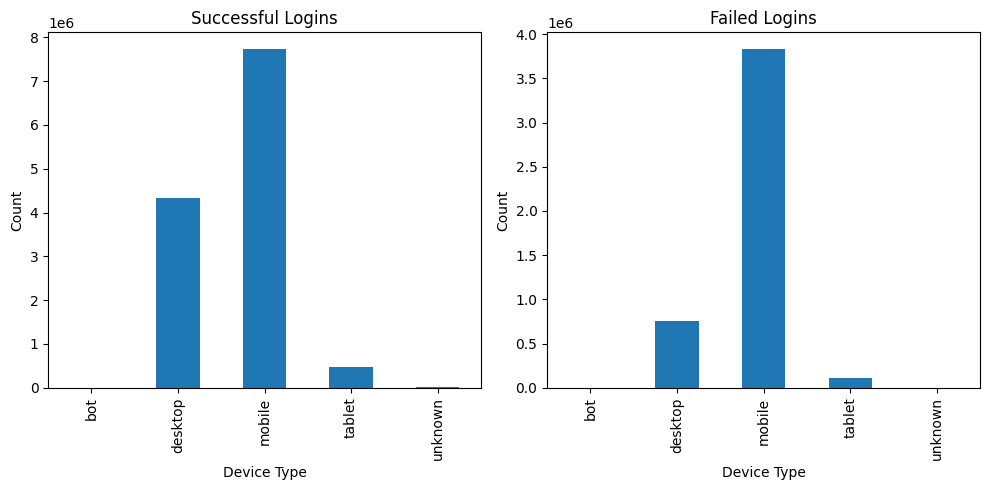

In [23]:
# Representation based on Device Type
grouped_data = Dataset.groupby(['Login Successful', 'Device Type'])['User ID'].count()

# Get the count of each device type for successful logins
success_counts = grouped_data[True].reset_index(name='count').set_index('Device Type')['count']
# Get the count of each device type for failed logins
failure_counts = grouped_data[False].reset_index(name='count').set_index('Device Type')['count']

# Create two bar graphs side by side to visualize login success and failure by device type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title("Successful Logins")
success_counts.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Device Type')
ax1.set_ylabel('Count')

ax2.set_title("Failed Logins")
failure_counts.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Device Type')
ax2.set_ylabel('Count')

# Display the graphs
plt.tight_layout()
plt.show()

In [24]:
# Convert the 'Login Timestamp' column to datetime format
Dataset['Timestamp'] = pd.to_datetime(Dataset['Login Timestamp'])

# Extract year, month, day, hour, minute, and second information into separate columns
Dataset['Year'] = Dataset['Timestamp'].dt.year
Dataset['Month'] = Dataset['Timestamp'].dt.month
Dataset['Day'] = Dataset['Timestamp'].dt.day
Dataset['Hour'] = Dataset['Timestamp'].dt.hour
Dataset['Minute'] = Dataset['Timestamp'].dt.minute
Dataset['Second'] = Dataset['Timestamp'].dt.second

# Remove the original 'Login Timestamp' and 'Timestamp' columns
Dataset.drop(['Login Timestamp', 'Timestamp'], inplace=True, axis=1)

In [25]:
test_df = Dataset.sample(10000) # Randomly selecting 10000 entries

In [26]:
# Specify the columns to encode
columns_to_encode = ['IP Address', 'Country', 'Region', 'City', 'Device Type', 'Browser Name', 'Version']

# Initialize an empty dataframe for the encoded columns
encoded_df = pd.DataFrame()

# Iterate over the columns to encode
for column in columns_to_encode:
    # Apply count encoding to the column
    freq_encoder = encoders.CountEncoder(cols=[column])
    encoded_column = freq_encoder.fit_transform(test_df[column])
    
    # Concatenate the encoded column to the dataframe
    encoded_df = pd.concat([encoded_df, encoded_column], axis=1)

# Drop the original columns from the dataframe
test_df.drop(columns=columns_to_encode, inplace=True)

# Concatenate the original dataframe with the encoded columns
test_df_encoded = pd.concat([test_df, encoded_df], axis=1)

# Convert the 'Login Successful' column to integer type
test_df_encoded['Login Successful'] = test_df_encoded['Login Successful'].astype(int)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_df_encoded)
df_scaled = scaled_data

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)

In [27]:
# Calculate the variance of the original data
original_variance = np.var(df_scaled, axis=0).sum()

# Calculate the variance of the selected features
selected_features_variance = np.var(pca.transform(df_scaled), axis=0).sum()

# Calculate the variance lost
variance_lost = original_variance - selected_features_variance

# Print the variance lost
print(f"Variance Lost: {variance_lost:.4f}")

Variance Lost: 11.0212


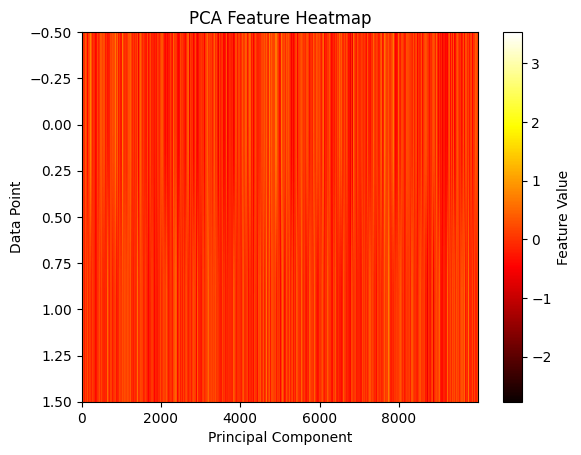

In [28]:
# Create a heatmap of the PCA features
plt.imshow(np.transpose(pca_features), cmap='hot', aspect='auto')
plt.xlabel('Principal Component')
plt.ylabel('Data Point')
plt.title('PCA Feature Heatmap')
plt.colorbar(label='Feature Value')

# Show the plot
plt.show()


In [29]:
# LOF plot to identify local anomalies in a dataset
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_pred = lof.fit_predict(pca_features)

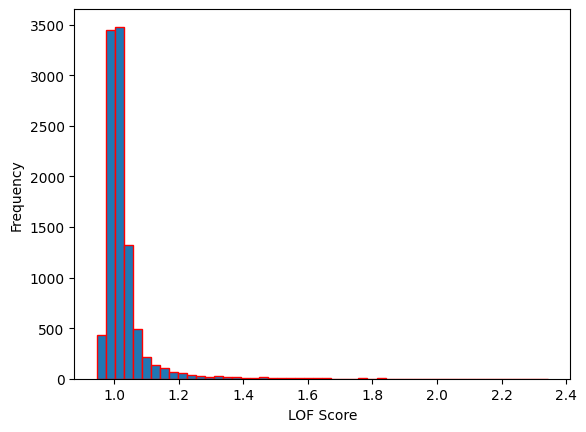

In [30]:
# Get the LOF scores for the data points
lof_scores = lof.negative_outlier_factor_

# Convert the LOF scores to positive values
lof_scores = -1 * lof_scores

# Ploting the LOF scores using a histogram
plt.hist(lof_scores, bins=50, edgecolor="red")
plt.xlabel('LOF Score')
plt.ylabel('Frequency')
plt.show()

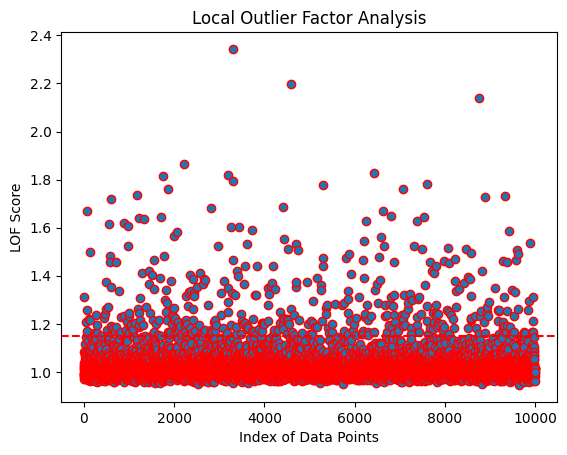

In [31]:
# Define the threshold for identifying anomalies
lof_threshold = 1.15

# plot LOF scores against the index of the data points
plt.scatter(range(len(lof_scores)), lof_scores, edgecolor="red")

# add a horizontal line at the threshold for identifying anomalies
plt.axhline(y=lof_threshold, color='r', linestyle='--')

# add axis labels and a title
plt.xlabel('Index of Data Points')
plt.ylabel('LOF Score')
plt.title('Local Outlier Factor Analysis')
plt.show()

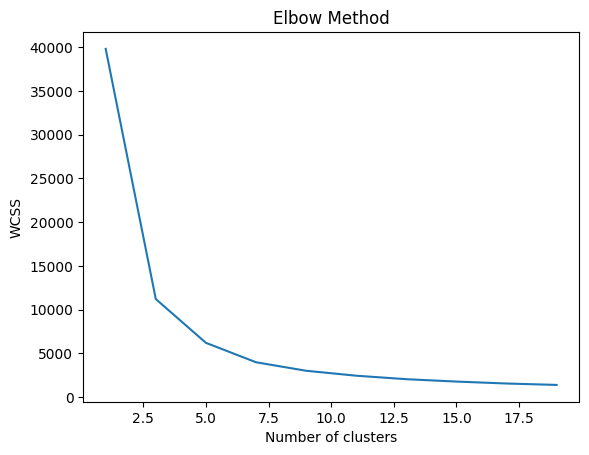

In [32]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 21, 2):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=5000, n_init=10, random_state=0)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21, 2), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\Sarthak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


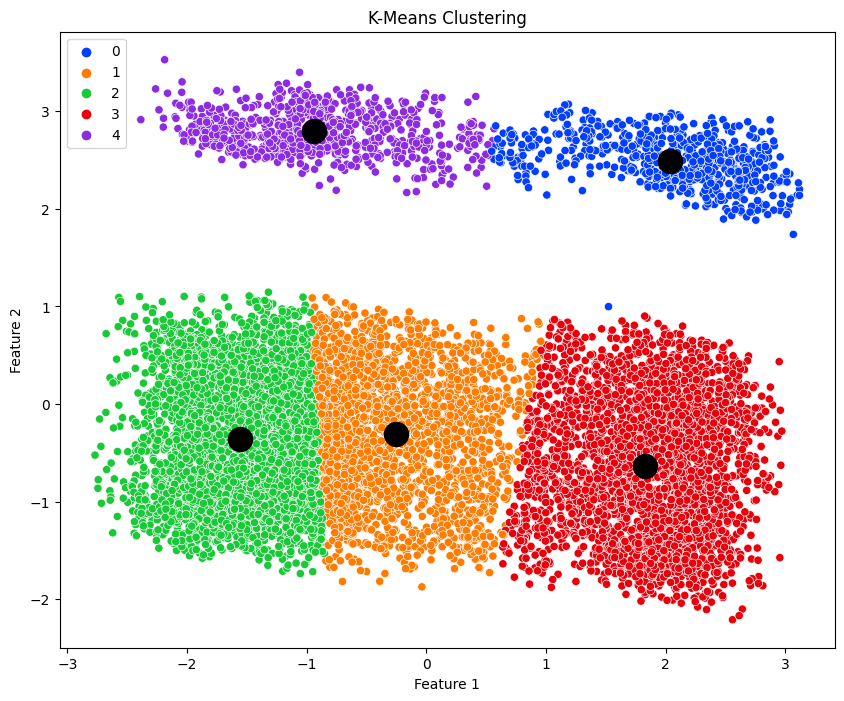

In [33]:
# Fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=5)
pred_y = kmeans.fit_predict(pca_features)

# Visualize the clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=pred_y, palette='bright')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

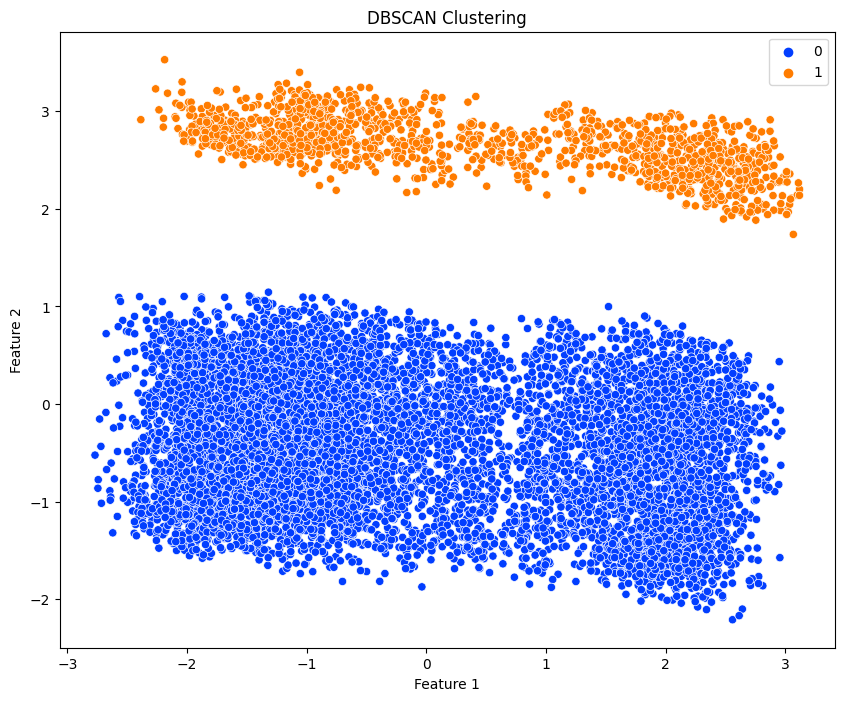

In [34]:
from sklearn.cluster import DBSCAN

# DBSCAN model
dbscan = DBSCAN()
clusters = dbscan.fit_predict(pca_features)

# Visualization of clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='bright', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

c:\Users\Sarthak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


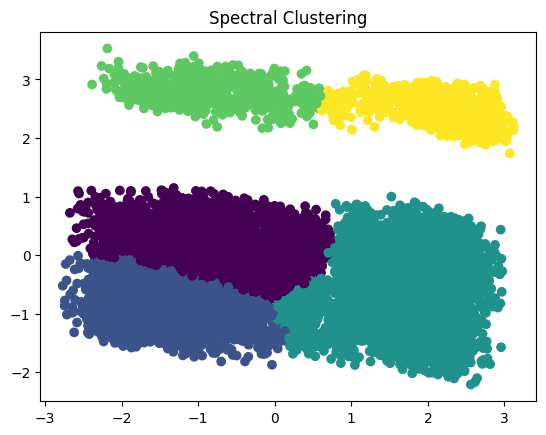

In [35]:
from sklearn.cluster import SpectralClustering

# Create spectral clustering object with 2 clusters
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans')

# Fit and predict using the clustering object
cluster_labels = spectral_clustering.fit_predict(pca_features)

# Plot the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()

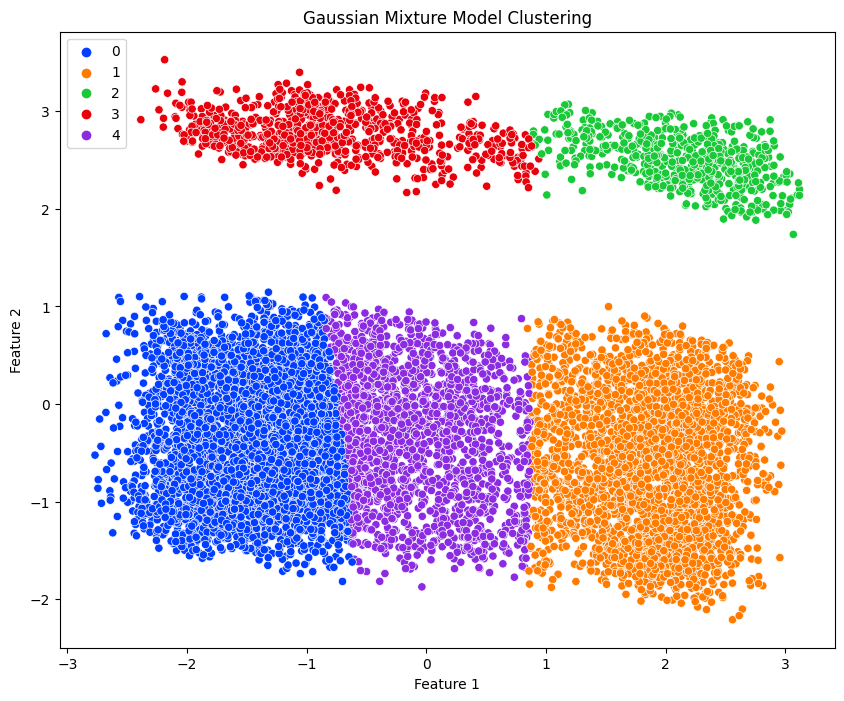

In [36]:
from sklearn.mixture import GaussianMixture

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
gmm.fit(pca_features)

# Predict the cluster labels
pred_y = gmm.predict(pca_features)

# Visualize the clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=pred_y, palette='bright')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

c:\Users\Sarthak Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


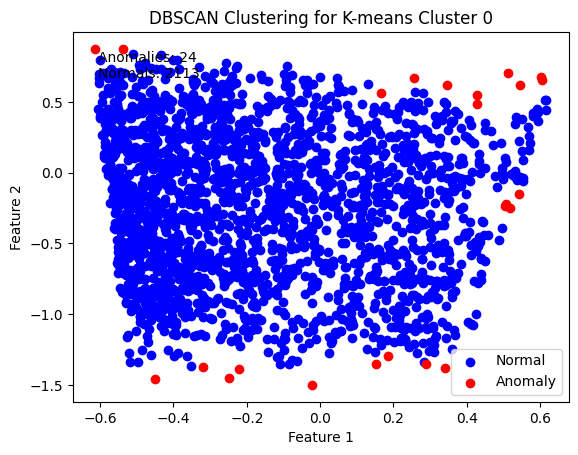

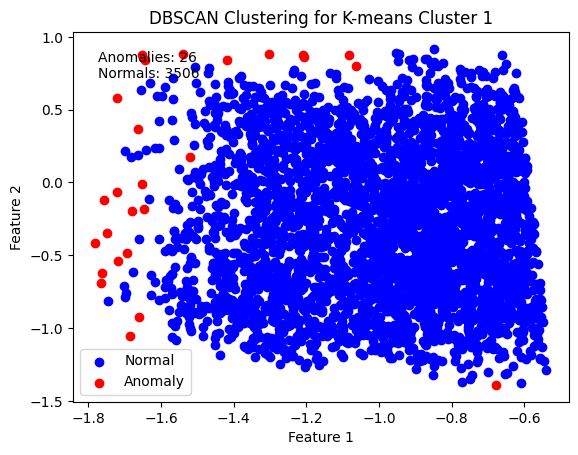

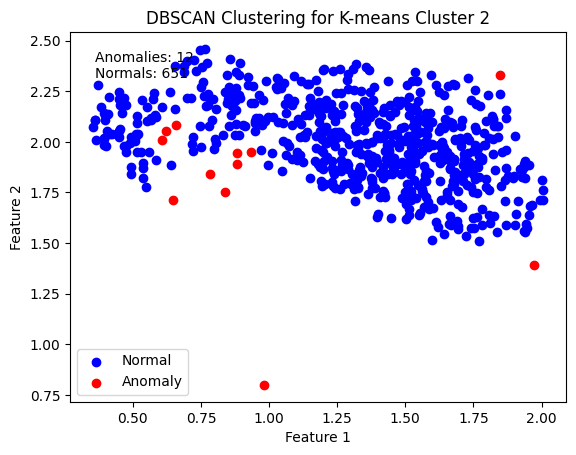

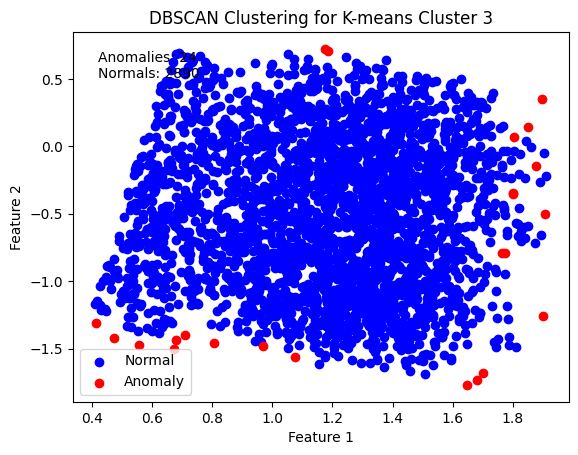

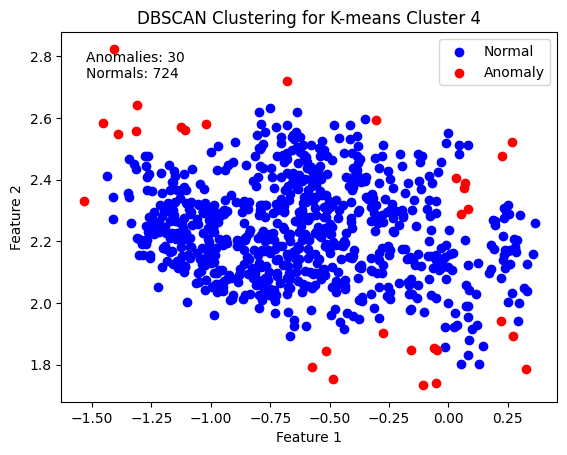

In [37]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(pca_features)

# Scale the data for DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_features)

# Perform DBSCAN on each K-means cluster
for cluster_label in set(kmeans_clusters):
    cluster_data = scaled_data[kmeans_clusters == cluster_label]

    # Perform DBSCAN with highly sensitive parameters
    dbscan = DBSCAN(eps=0.075, min_samples=5)  
    dbscan_clusters = dbscan.fit_predict(cluster_data)

    # Identify anomalies (cluster label -1) and normal points (cluster label >= 0)
    anomaly_mask = dbscan_clusters == -1
    normal_mask = dbscan_clusters >= 0

    # Count the number of anomalies and non-anomalies
    num_anomalies = sum(anomaly_mask)
    num_normals = sum(normal_mask)

    # Visualize the clusters
    plt.scatter(cluster_data[normal_mask, 0], cluster_data[normal_mask, 1], c='blue', label='Normal')
    plt.scatter(cluster_data[anomaly_mask, 0], cluster_data[anomaly_mask, 1], c='red', label='Anomaly')
    plt.title(f"DBSCAN Clustering for K-means Cluster {cluster_label}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    # Add annotation for the count of anomalies and non-anomalies
    plt.text(0.05, 0.95, f"Anomalies: {num_anomalies}\nNormals: {num_normals}", 
             transform=plt.gca().transAxes, ha='left', va='top')

    plt.show()


In [38]:
# Save the preprocessed dataset to a file
preprocessed_data_path = "../data/refined_data.csv"
Dataset.to_csv(preprocessed_data_path, index=False)
print(f"Preprocessed data saved to: {preprocessed_data_path}")


Preprocessed data saved to: ../data/refined_data.csv
